<a href="https://colab.research.google.com/github/ParkEunbin/ML_basic/blob/main/210122_Iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS 분류하기
- petal(꽃잎)의 길이와 폭, sepal (꽃받침)의 길이와 폭 에따라 꽃 종류를 분류
- 종속변수가 양적데이터 : 회귀 (regression) 
- 종속병수가 범주형데이터 : 분류 (classification)



# 원핫인코딩
- 기존에 사용하던 수식,,범주를 숫자로 나타내주는 과정이 필요함
- 각 범주에 해당하는 column에 1을 넣어줌 > 0과 1로 된 데이터가 나옴
-> 아이리스 = pd.get_dummies(아이리스) 로 만들어줌
- 범주가 3가지 이니 출력단이 3개 필요


# softmax
- 분류모델 > 분류를 추측하는 것 
- ex) 동전 앞면이 나올 확률은 50%
- 이런식으로 결과를 확률로 나타내는 것 > 이렇게 나타내 주는 것 > softmax, sigmoid
- 0.7 / 0.3 / 0 인 경우 > setosa일 가능성은 70%, virginica일 가능성은 30% 
- softmax(수식) > 0과 1사이의 값으로 결과를 내줌
- 분류에 사용하는 loss > categorical_crossentropy
- 평가지표 : 정확도(accuracy)로 판단 > 1이면 정확히 맞춘 것
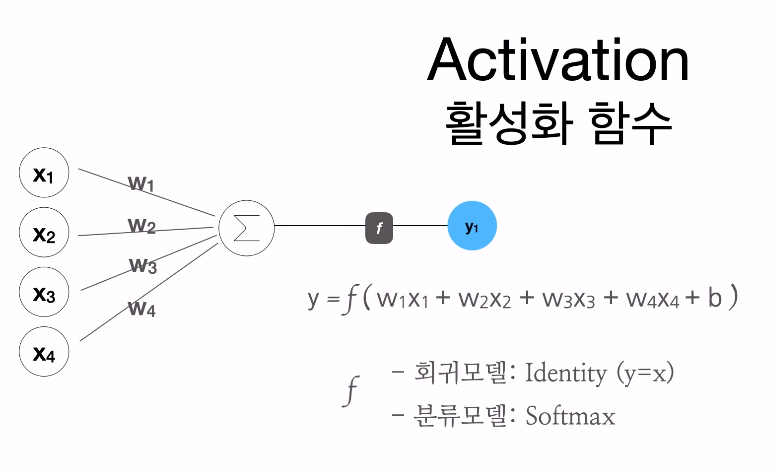

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
#1. 과거의 데이터를 준비
파일경로 ='https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv'
아이리스=pd.read_csv(파일경로)
아이리스.head()

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#원핫인코딩
인코딩= pd.get_dummies(아이리스)
인코딩.head()

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종_setosa,품종_versicolor,품종_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [4]:
print(인코딩.columns)

Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종_setosa', '품종_versicolor',
       '품종_virginica'],
      dtype='object')


In [5]:
독립=인코딩[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
종속=인코딩[['품종_setosa', '품종_versicolor','품종_virginica']]
print(독립.shape,종속.shape)

(150, 4) (150, 3)


In [7]:
#2. 모델의 구조 만들기
X=tf.keras.layers.Input(shape=[4])
Y=tf.keras.layers.Dense(3,activation='softmax')(X)
model= tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [9]:
#3. 모델 학습시키기
model.fit(독립,종속,epochs=1000,verbose=0)
model.fit(독립,종속,epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1490 - accuracy: 0.9733
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1490 - accuracy: 0.9733
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9733
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.9733
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1494 - accuracy: 0.9733
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1485 - accuracy: 0.9733
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9733
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.9733
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9733
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.1485 - accuracy: 0.9733


In [10]:
#4. 모델 이용하기
model.predict(독립[0:5])

array([[9.9922323e-01, 7.7681692e-04, 4.0710038e-08],
       [9.9699903e-01, 3.0006366e-03, 3.6439934e-07],
       [9.9850237e-01, 1.4975842e-03, 1.4861196e-07],
       [9.9579263e-01, 4.2065950e-03, 6.7809879e-07],
       [9.9934322e-01, 6.5673696e-04, 3.3204451e-08]], dtype=float32)

In [11]:
print(종속[0:5])

   품종_setosa  품종_versicolor  품종_virginica
0          1              0             0
1          1              0             0
2          1              0             0
3          1              0             0
4          1              0             0


In [12]:
model.predict(독립[-5:])

array([[4.1977071e-07, 8.7861136e-02, 9.1213846e-01],
       [1.1189775e-06, 1.7300382e-01, 8.2699507e-01],
       [1.8816861e-06, 2.0252289e-01, 7.9747528e-01],
       [3.0589572e-07, 7.2331734e-02, 9.2766792e-01],
       [3.8643052e-06, 2.6215187e-01, 7.3784429e-01]], dtype=float32)

In [13]:
print(종속[-5:])

     품종_setosa  품종_versicolor  품종_virginica
145          0              0             1
146          0              0             1
147          0              0             1
148          0              0             1
149          0              0             1


In [14]:
#학습한 가중치
model.get_weights()

[array([[ 0.71043974, -0.02298668, -0.9673617 ],
        [ 2.5520568 ,  0.13821813, -1.1648371 ],
        [-3.2298753 ,  0.3740773 ,  1.6761324 ],
        [-4.107513  , -1.4014975 ,  2.4595425 ]], dtype=float32),
 array([ 1.9168943,  1.3595377, -1.715028 ], dtype=float32)]

setosa일 확률 = softmax (0.71043974*x1 + 2.5520568*x2 -3.2298753*x3 -4.107513*x4 + 1.9168943)
